# Импорт библиотек

In [73]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Настройка CometML
<img src='https://camo.githubusercontent.com/b35adf34bc440ea2ac19bb0d3432f48e26d71ab8e4c256e936b709eec44f5b19/68747470733a2f2f7777772e636f6d65742e6d6c2f696d616765732f6c6f676f5f636f6d65745f6c696768742e706e67' width=500px>

In [ ]:
#!pip install comet_ml

In [74]:
from comet_ml import Experiment

In [75]:
# Извлекаем настройки для 
import os
from dotenv import load_dotenv

load_dotenv()

api_key = os.getenv('api_key')
project_name = os.getenv('project_name')
workspace = os.getenv('workspace')

In [76]:
# Создайте эксперимент с помощью вашего API ключа
experiment = Experiment(
    api_key=api_key,
    project_name=project_name,
    workspace=workspace,
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/dnt1971/medical-appointment/168411cd023e47f4baf32c935a118e1a



COMET INFO: Couldn't find a Git repository in 'c:\\docs\\Дима\\skillFactory\\лекции\\EDA_5_Проектирование экспериментов' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.


# Загрузка данных

In [77]:
df = pd.read_csv('./data/KaggleV2-May-2016.csv')

In [78]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


# Визуализация

### Распределение числовых признаков

{'web': 'https://www.comet.com/api/image/download?imageId=52ec10a532284465958c28f9d807f37b&experimentKey=168411cd023e47f4baf32c935a118e1a',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=52ec10a532284465958c28f9d807f37b&experimentKey=168411cd023e47f4baf32c935a118e1a',
 'imageId': '52ec10a532284465958c28f9d807f37b'}

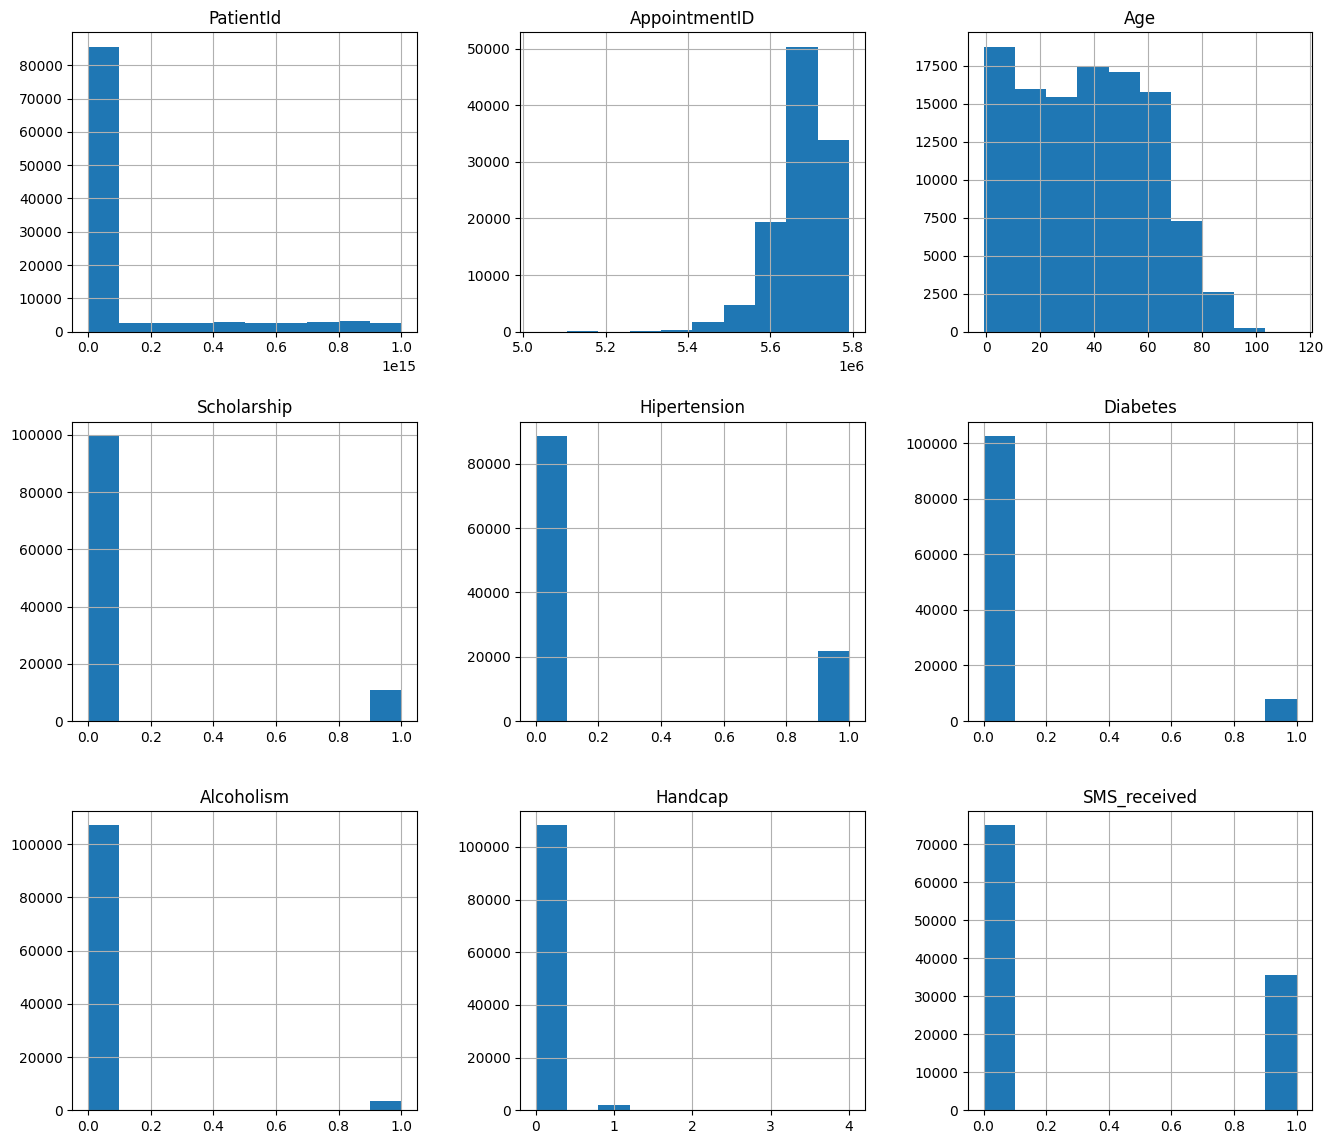

In [80]:
df.hist(figsize=(16,14));
##логируем гистограмму
experiment.log_figure(figure=plt)

*Проанализируем число людей каждого возраста*

In [81]:
print("Уникальные значения в `Age` => {}".format(df.Age.unique()))

Уникальные значения в `Age` => [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]


In [82]:
# Удалим аномальные значения
df = df[(df.Age >= 0) & (df.Age <= 110)]
df.Age.value_counts()

Age
0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
97       11
98        6
100       4
102       2
99        1
Name: count, Length: 102, dtype: int64

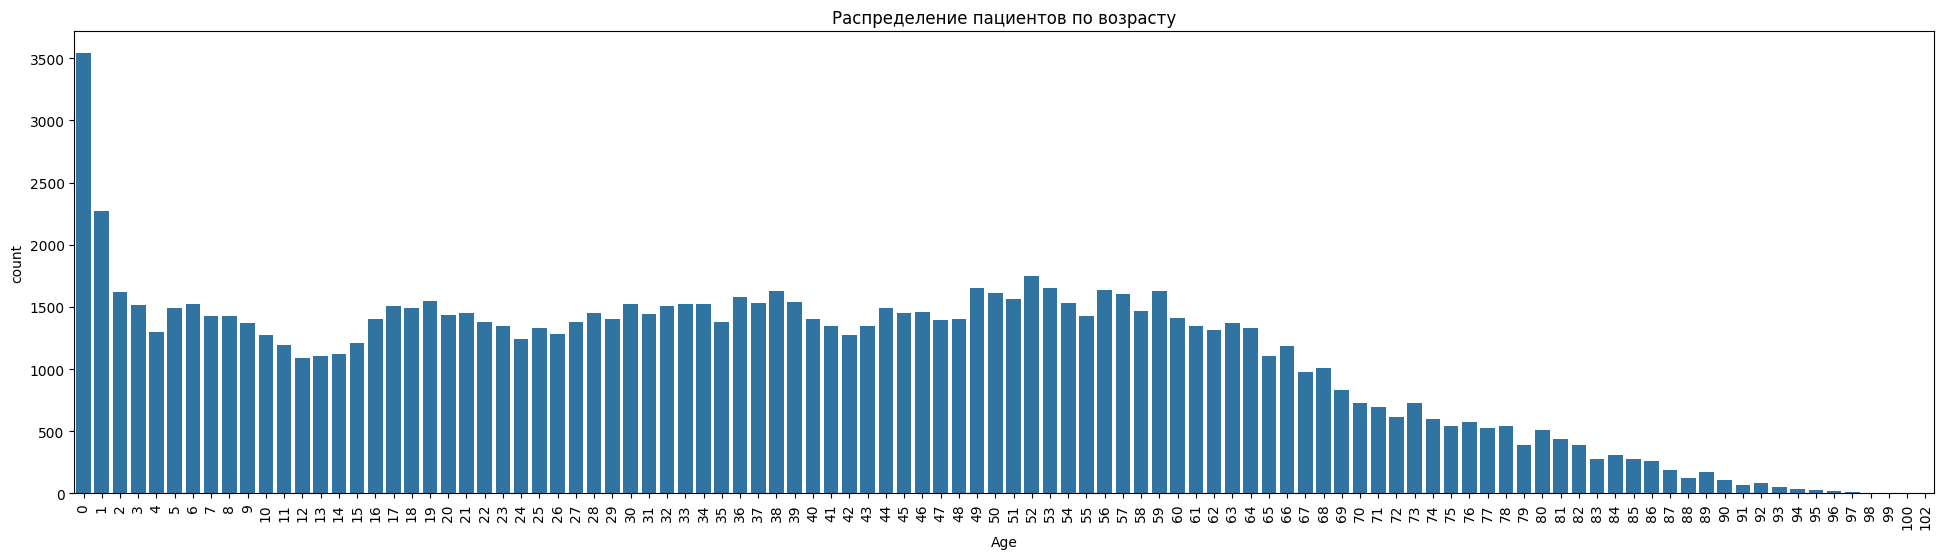

In [83]:
plt.figure(figsize=(24,6))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.Age)
ax.set_title("Распределение пациентов по возрасту")
experiment.log_figure(figure=plt)
plt.show()

In [ ]:
# Доя наглядности отобразим первые и последние значения признаков
column_names = ["Age","Scholarship","Hipertension","Diabetes","Alcoholism","Handcap","SMS_received"]

for col_name in column_names:
    #print(df[ col_name ].value_counts())
    print( f"{col_name} ==> {df[ col_name ].sort_values().unique()[:10]} ... {df[ col_name ].sort_values().unique()[-10:]}\n" )  


Age ==> [0 1 2 3 4 5 6 7 8 9] ... [ 92  93  94  95  96  97  98  99 100 102]

Scholarship ==> [0 1] ... [0 1]

Hipertension ==> [0 1] ... [0 1]

Diabetes ==> [0 1] ... [0 1]

Alcoholism ==> [0 1] ... [0 1]

Handcap ==> [0 1 2 3 4] ... [0 1 2 3 4]

SMS_received ==> [0 1] ... [0 1]



# Проанализируем попарные корреляции числовых и бинарных признаков

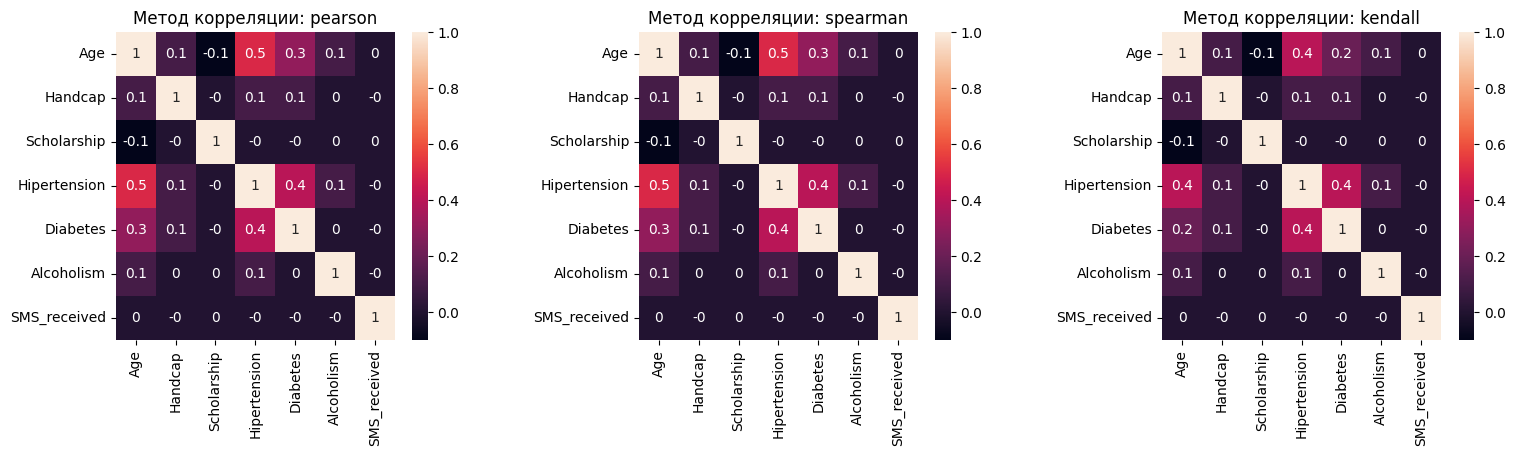

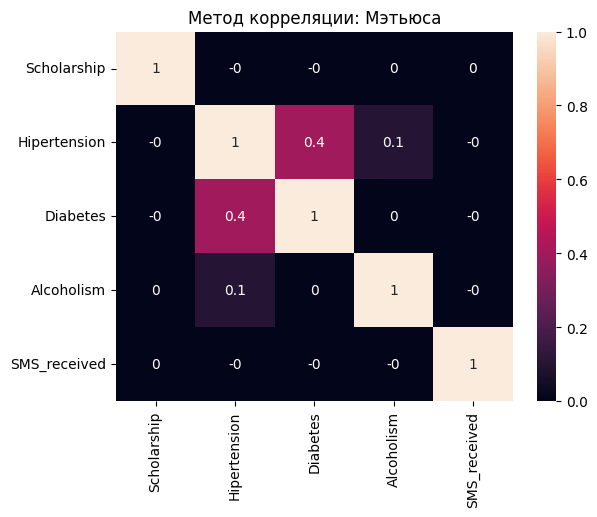

In [84]:
############################################################################################
#
# Отображает 3 тепловых карты для визуального анализа корреляций признаков
# Вход: 
#     df - анализируемый датафрейм
#     accuracy - точность округления коэффициента корреляций
#
############################################################################################
def heatmap_corr( df, accuracy, experiment ):
    # Для сравнения смотрим все методы
    methods = ['pearson','spearman','kendall']

    fig, axes = plt.subplots(1, 3, figsize=(18, 4))
    #Интервал
    fig.subplots_adjust(hspace = 0.3, wspace=0.5)

    for ind, method in enumerate( methods ):
        tmp_df_corr = df.corr(numeric_only=True, method=method)
        sns.heatmap( tmp_df_corr.round(accuracy), annot=True, ax=axes[ind])
        
        axes[ind].set_title( f"Метод корреляции: {method}" )
    
    experiment.log_figure(figure=plt)
    plt.show()

############################################################################################
#
# Отображает тепловую карту - корреляцию Мэтьюса между бинарными переменными для визуального анализа корреляций признаков
# Вход: 
#     df - анализируемый датафрейм
#     accuracy - точность округления коэффициента корреляций
#
############################################################################################
def heatmap_corr_matthews( df, accuracy, experiment ):
    ############################################################################################
    #
    # Вычисляет корреляцию Мэтьюса между бинарными переменными
    # Вход: 
    #     df - анализируемый датафрейм
    #     column_names - Список бинарных признаков
    #
    ############################################################################################
    def get_corr_matthews( df, column_names ):
        from sklearn.metrics import matthews_corrcoef
        import numpy as np

        mlen = len( column_names )
        arr_corr = np.ones((mlen, mlen), 'float')

        for ind_x, col_name_x in enumerate( column_names ):
            x = df[col_name_x].to_list()
            for ind_y, col_name_y in enumerate( column_names[ ind_x + 1: ] ):
                y = df[col_name_y].to_list()
                
                tmp_corr = matthews_corrcoef(x, y)
                arr_corr[ind_x][ind_x + ind_y + 1] = tmp_corr
                arr_corr[ind_x + ind_y + 1][ind_x] = tmp_corr
                
            df_corr = pd.DataFrame(
                data = arr_corr,
                index = column_names,
                columns = column_names
            )
        return df_corr
    
    df_corr = get_corr_matthews( df = df, column_names = ["Scholarship","Hipertension","Diabetes","Alcoholism","SMS_received"] )  
    
    ax = plt.axes()
    sns.heatmap( df_corr.round( accuracy ), annot=True, ax = ax )
    ax.set_title( f"Метод корреляции: Мэтьюса" )
    experiment.log_figure(figure=plt)
    plt.show()

tmp_df = df[["Age","Handcap","Scholarship","Hipertension","Diabetes","Alcoholism","SMS_received"]].copy()

# Смотрим корреляцию через методы corr
heatmap_corr(tmp_df, 1, experiment )
# Корреляцию бинарных признаков смотрим через специально адаптированный для этого случая метод Мэтьюса 
heatmap_corr_matthews( tmp_df, 1, experiment )
# Корреляцию Мэтьюса и  Пирсона/Спирмена/Кендала сошлись - методы не противоречат друг другу

Из графиков видно, что имеется связь между признаками: 

- (Age,Hipertension) - средняя
- (Diabetes,Hipertension) - слабая
- (Age,Diabetes) - очень слабая

Остальные признаки либо не связаны, либо очень слабо связаны

COMET INFO: Trying to log a figure that is exceeding allowed SVG file size limit (590373579 > 1048576). Falling back to PNG format.


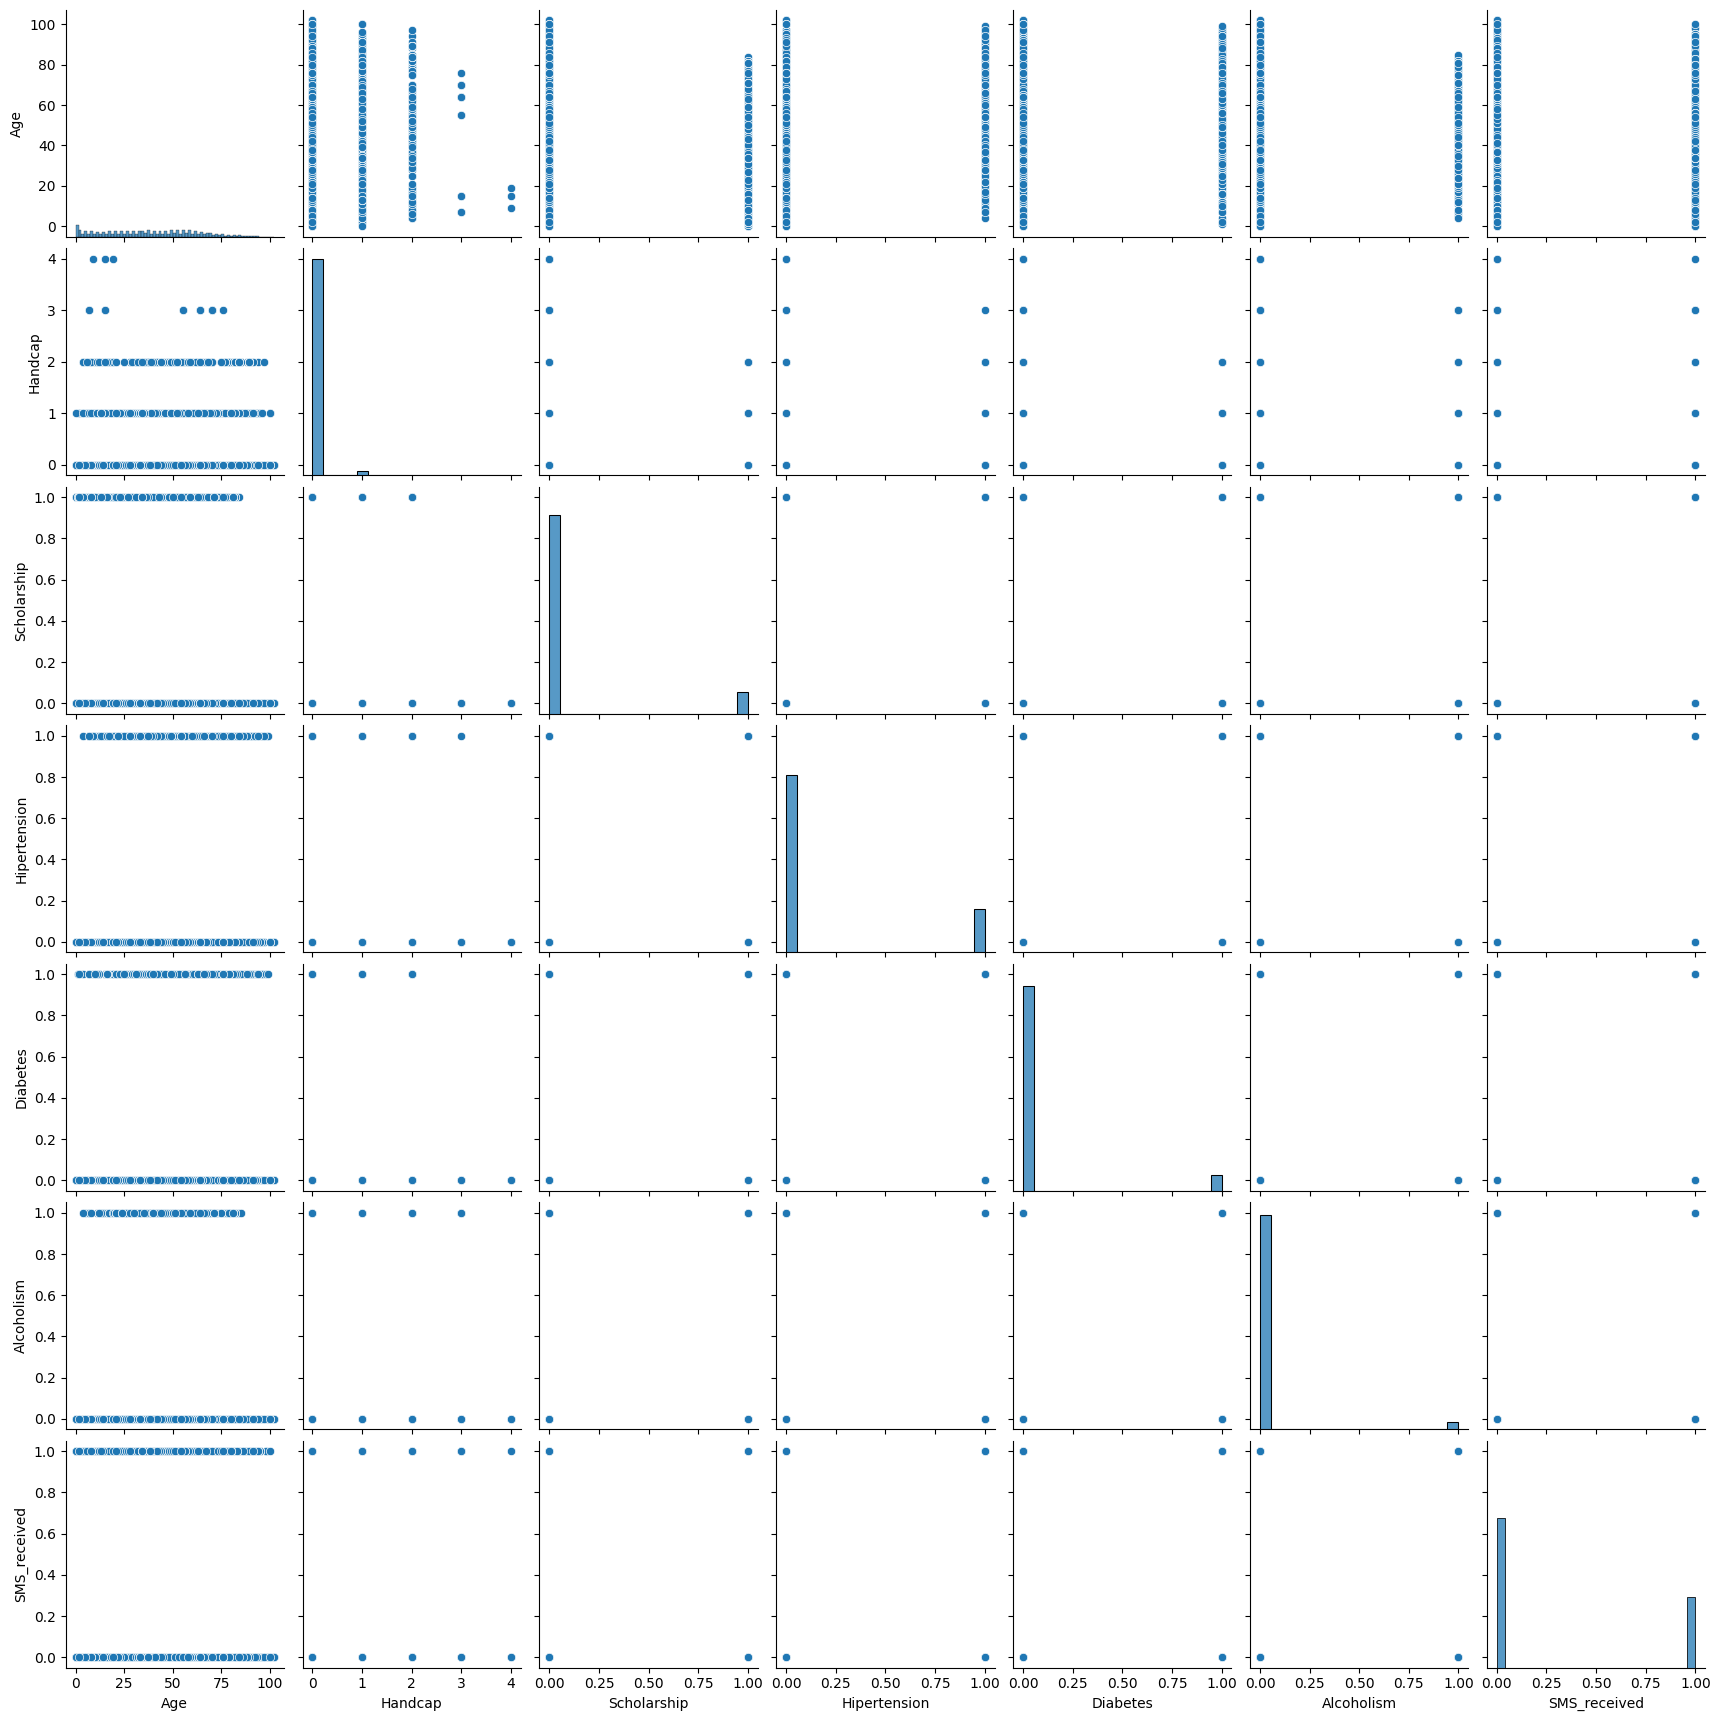

In [86]:
# Ну и посмотрим попарно корреляции признаков
sns.pairplot(tmp_df)
experiment.log_figure(figure=plt)
plt.show()

# Придет ли пациент на назначенный прием? 

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110521 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110521 non-null  float64
 1   AppointmentID   110521 non-null  int64  
 2   Gender          110521 non-null  object 
 3   ScheduledDay    110521 non-null  object 
 4   AppointmentDay  110521 non-null  object 
 5   Age             110521 non-null  int64  
 6   Neighbourhood   110521 non-null  object 
 7   Scholarship     110521 non-null  int64  
 8   Hipertension    110521 non-null  int64  
 9   Diabetes        110521 non-null  int64  
 10  Alcoholism      110521 non-null  int64  
 11  Handcap         110521 non-null  int64  
 12  SMS_received    110521 non-null  int64  
 13  No-show         110521 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


## Кодировка категориальных признаков

In [88]:
categorical_columns_names = ['Gender', 'Neighbourhood']

In [89]:
encoded_columns = pd.get_dummies(df, columns = categorical_columns_names)

In [90]:
encoded_columns.drop(['AppointmentID', 'PatientId', 'ScheduledDay', 'AppointmentDay', 'No-show'], axis=1, inplace = True)

In [91]:
display(encoded_columns.head())

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Gender_F,Gender_M,Neighbourhood_AEROPORTO,...,Neighbourhood_SANTOS REIS,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM
0,62,0,1,0,0,0,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,56,0,0,0,0,0,0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,62,0,0,0,0,0,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,8,0,0,0,0,0,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,56,0,1,1,0,0,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [92]:
y = df['No-show']

In [93]:
y

0         No
1         No
2         No
3         No
4         No
          ..
110522    No
110523    No
110524    No
110525    No
110526    No
Name: No-show, Length: 110521, dtype: object

In [94]:
y = y.replace({'No': 0, 'Yes': 1})

C:\Users\user\AppData\Local\Temp\ipykernel_3536\3050984062.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({'No': 0, 'Yes': 1})


In [95]:
y.value_counts(True)

No-show
0    0.798084
1    0.201916
Name: proportion, dtype: float64

## Шкалирование данных

In [96]:
from sklearn.preprocessing import MinMaxScaler

In [97]:
scaler = MinMaxScaler()
X = scaler.fit_transform(encoded_columns)

In [98]:
print(X.shape)

(110521, 90)


# Модель (этот раздел будет подробно изучен далее в курсе)

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Инициализация модели

In [100]:
logreg = LogisticRegression()

In [101]:
random_state = 42

### Обучение модели

In [102]:
logreg.fit(X, y)

LogisticRegression()

#### Логирование параметров обучения

In [103]:
params={"random_state":random_state,
        "model_type":"logreg"
}

In [104]:
experiment.log_parameters(params)

### Предсказания модели

In [105]:
y_pred = logreg.predict(X)

### Анализ модели

In [106]:
accuracy = accuracy_score(y, y_pred)

print("Доля правильных ответов: {:6.3f}".format(accuracy))

Доля правильных ответов:  0.798


# Логирование метрик

In [107]:
metrics = {"accuracy":accuracy}

In [108]:
experiment.log_metrics(metrics)

<img src='https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@r2yYhe2DpE4d3WKP.png' width=700px>

In [109]:
experiment.log_confusion_matrix(y.tolist(), y_pred.tolist())

{'web': 'https://www.comet.com/api/asset/download?assetId=5d878d1bd59745df87069e1bf9c8a71a&experimentKey=168411cd023e47f4baf32c935a118e1a',
 'api': 'https://www.comet.com/api/rest/v2/experiment/asset/get-asset?assetId=5d878d1bd59745df87069e1bf9c8a71a&experimentKey=168411cd023e47f4baf32c935a118e1a',
 'assetId': '5d878d1bd59745df87069e1bf9c8a71a'}

In [112]:
experiment.display()

In [111]:
experiment.end()

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : beige_toad_7407
COMET INFO:     url                   : https://www.comet.com/dnt1971/medical-appointment/168411cd023e47f4baf32c935a118e1a
COMET INFO:   Metrics:
COMET INFO:     accuracy : 0.7980836221170637
COMET INFO:   Parameters:
COMET INFO:     C                 : 1.0
COMET INFO:     class_weight      : None
COMET INFO:     clip              : False
COMET INFO:     copy              : True
COMET INFO:     dual              : False
COMET INFO:     feature_range     : (0, 1)
COMET INFO:     fit_intercept     : True
COMET INFO:     intercept_scaling : 1
COMET INFO:     l1_ratio          : None
COMET INFO:     max_iter          : 100
COMET INFO:    

# Домашнее задание

Визуализируйте корреляцию между числовыми признаками, использованными для обучения модели и залогируйте изображение в Comet.

В качестве ответа приложите обновленный ноутбук.

*Форма оценки ментором:*

1) Проведена визуализация корреляции между 7 числовыми признаками, использованными для обучения модели - 5 баллов

2) Произведено логирование графика в CometMl - 10 баллов
